In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from phantominator import shepp_logan
import SimpleITK as sitk

In [2]:
def import_shepp_logan(size=512):
    image_flipped = shepp_logan(512)
    image_phantom = np.flip(image_flipped)
    return image_phantom

def FBP_Radon(image, number_angles = 500):
    angles = np.linspace(0, 180, number_angles)
    sinogram = radon(image, theta = angles, circle = False, preserve_range=True)
    return sinogram

def FBP_Iradon(sinogram, number_angles = 500):
    angles = np.linspace(0, 180, number_angles)
    fbp = iradon(sinogram, theta = angles, circle = False)
    return fbp

def import_dicom_sitk(path):
    img = sitk.ReadImage(path)
    image = sitk.GetArrayFromImage(img) # z, y, x
    return image[0]

## Teste do MAR com fantoma

In [3]:
size = 512
image = import_shepp_logan(size)

In [4]:
metal_value = image.max()*10
image[200:250, 200:250] = metal_value

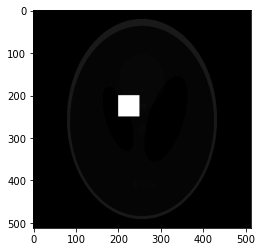

In [5]:
plt.imshow(image, cmap='gray')

In [6]:
sinogram = FBP_Radon(image)

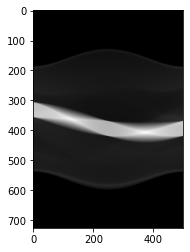

In [7]:
plt.imshow(sinogram, cmap='gray')

In [8]:
image_metal = np.zeros((size,size))

In [9]:
image_metal[200:250, 200:250] = metal_value

In [10]:
sinogram_metal = FBP_Radon(image_metal)

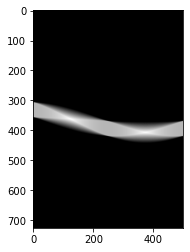

In [11]:
plt.imshow(sinogram_metal, cmap='gray')

In [12]:
sinogram_corrected = sinogram - sinogram_metal

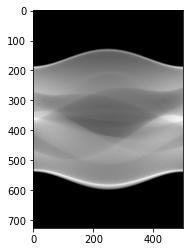

In [13]:
plt.imshow(sinogram_corrected, cmap='gray')

In [14]:
fbp = FBP_Iradon(sinogram_corrected)

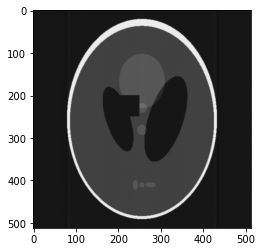

In [15]:
plt.imshow(fbp, cmap='gray')

# Teste do MAR com imagem real

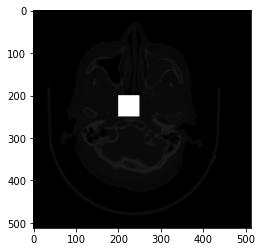

In [35]:
img_dcm = import_dicom_sitk('./Referências/CT 1.25 MMC/CT000120.dcm')
metal_value_dcm = img_dcm.max()*10
img_dcm[img_dcm <= -2000] = -1024
img_dcm[200:250, 200:250] = metal_value_dcm
plt.imshow(img_dcm, cmap='gray')

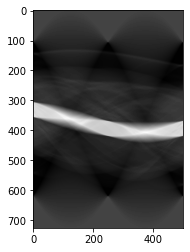

In [36]:
sinogram_dcm = FBP_Radon(img_dcm)
plt.imshow(sinogram_dcm, cmap='gray')

In [44]:
def get_artifact_from_data(image, threshold):
    x, y = image.shape
    image_metal = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            if(image[i, j] >= threshold):
                image_metal[i, j] = threshold
    return image_metal

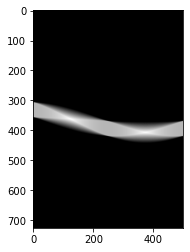

In [45]:
image_metal_dcm = get_artifact_from_data(img_dcm, metal_value_dcm-1)
#image_metal_dcm[200:250, 200:250] = metal_value_dcm
sinogram_metal_dcm = FBP_Radon(image_metal_dcm)
plt.imshow(sinogram_metal_dcm, cmap='gray')

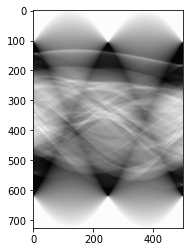

In [46]:
sinogram_corrected_dcm = sinogram_dcm - sinogram_metal_dcm
plt.imshow(sinogram_corrected_dcm, cmap='gray')

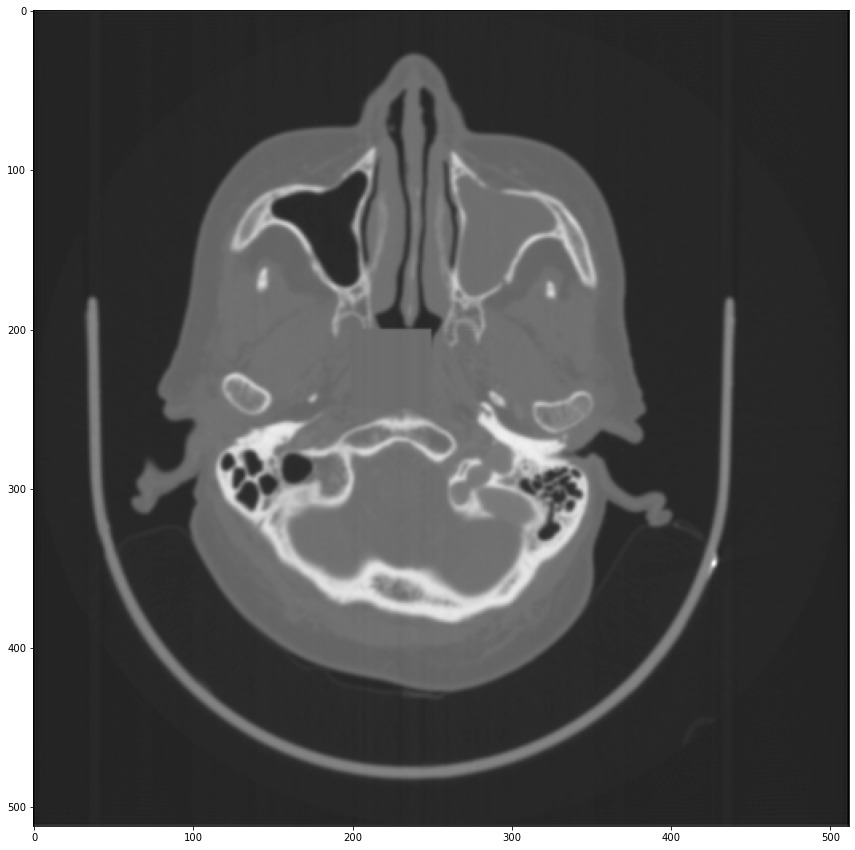

In [47]:
fbp_dcm = FBP_Iradon(sinogram_corrected_dcm)
plt.figure(figsize = (15,15))
plt.imshow(fbp_dcm, cmap='gray')

In [21]:
#plt.figure(figsize = (15,15))
#plt.savefig('image_phantom.png')

In [1]:
def simple_MAR(img, threshold = 3000):
    sinogram = Radon(img)
    image_metal = get_artifact_from_data(img, threshold)
    sinogram_metal = FBP_Radon(image_metal)
    sinogram_corrected = sinogram - sinogram_metal
    fbp = Iradon(sinogram_corrected)
    return fbp